# Funciones

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show_graph(x: np.ndarray, y: np.ndarray, name: str = None, interval: int = 10) -> None:
    """
    Muestra un gráfico de rendimiento con promedio cada N episodios.

    Args:
        x: Episodios
        y: Número de pasos
        name: Nombre para la leyenda
        interval: Intervalo de episodios para mostrar (default: 10)
    """
    # Agrupar cada 'interval' episodios y promediar
    num_intervals = len(y) // interval
    x_grouped = []
    y_grouped = []

    for i in range(num_intervals):
        start_idx = i * interval
        end_idx = (i + 1) * interval
        x_grouped.append(end_idx)  # Mostrar el episodio final del intervalo
        y_grouped.append(np.mean(y[start_idx:end_idx]))

    plt.figure(figsize=(10, 6))
    plt.plot(x_grouped, y_grouped, label = name)

    plt.xlabel("Episodios")
    plt.ylabel("Número de pasos (promedio cada 10 episodios)")
    plt.title("Rendimiento del agente")
    plt.grid(True, alpha=0.3)

    if name is not None:
        plt.legend()
    plt.show()

In [4]:
def show_graph_two(
    x1: np.ndarray, y1: np.ndarray, name1: str,
    x2: np.ndarray, y2: np.ndarray, name2: str,
    interval: int = 10,
    figsize_d: tuple = (10, 6)
) -> None:
    """
    Muestra dos gráficos de rendimiento con promedio cada N episodios en un mismo plot.

    Args:
        x1, y1: Datos del primer experimento.
        name1: Nombre del primer gráfico.
        x2, y2: Datos del segundo experimento.
        name2: Nombre del segundo gráfico.
        interval: Intervalo de agrupación para promediar.
    """

    def group_data(x, y, interval):
        num_intervals = len(y) // interval
        x_grouped = []
        y_grouped = []
        for i in range(num_intervals):
            start = i * interval
            end = (i + 1) * interval
            x_grouped.append(end)
            y_grouped.append(np.mean(y[start:end]))
        return np.array(x_grouped), np.array(y_grouped)

    # Agrupar
    x1_g, y1_g = group_data(x1, y1, interval)
    x2_g, y2_g = group_data(x2, y2, interval)

    # Plot
    plt.figure(figsize=figsize_d)
    plt.plot(x1_g, y1_g, label=name1)
    plt.plot(x2_g, y2_g, label=name2)

    plt.xlabel("Episodios")
    plt.ylabel(f"Valor promedio cada {interval} episodios")
    plt.title("Comparación de dos agentes")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

In [5]:
def read_monitor_file(filename: str, max_episodes: int = None) -> np.ndarray:
    """
    Lee un archivo .monitor.csv y retorna los largos de episodio.

    Args:
        filename: Ruta del archivo sin extensión .monitor.csv
        max_episodes: Número máximo de episodios a leer

    Returns:
        Array con los largos de episodios
    """
    try:
        df = pd.read_csv(f"{filename}.monitor.csv", skiprows = 1)
        episode_lengths = df['l'].values

        if max_episodes is not None:
            episode_lengths = episode_lengths[:max_episodes]

        return episode_lengths

    except Exception as e:
        print(f"Error leyendo {filename}: {e}")
        return None

In [6]:
def average_runs(base_filename: str, num_runs: int, max_episodes: int = None) -> np.ndarray:
    """
    Lee múltiples archivos y calcula el promedio de los largos de episodio.

    Args:
        base_filename: Nombre base de los archivos (ej: "dqn/dqn_results")
        num_runs: Número de corridas a promediar
        max_episodes: Número máximo de episodios a considerar

    Returns:
        Array con el promedio de largos por episodio
    """
    all_lengths = []

    for i in range(num_runs):
        filename = f"{base_filename}_{i}"
        lengths = read_monitor_file(filename, max_episodes)

        if lengths is not None:
            all_lengths.append(lengths)
            print(f"Corrida {i}: {len(lengths)} episodios")
        else:
            print(f"Advertencia: No se pudo leer corrida {i}")

    if not all_lengths:
        raise ValueError("No se pudo leer ningún archivo")

    # Asegurar que todas tengan la misma longitud
    min_length = min(len(l) for l in all_lengths)
    all_lengths = [l[:min_length] for l in all_lengths]

    # Convertir a matriz y promediar
    all_lengths = np.array(all_lengths)
    avg_lengths = np.mean(all_lengths, axis=0)

    print(f"\nPromedio calculado sobre {len(all_lengths)} corridas, {min_length} episodios")

    return avg_lengths

# Gráficos

## Memory

Corrida 0: 1500 episodios

Promedio calculado sobre 1 corridas, 1500 episodios


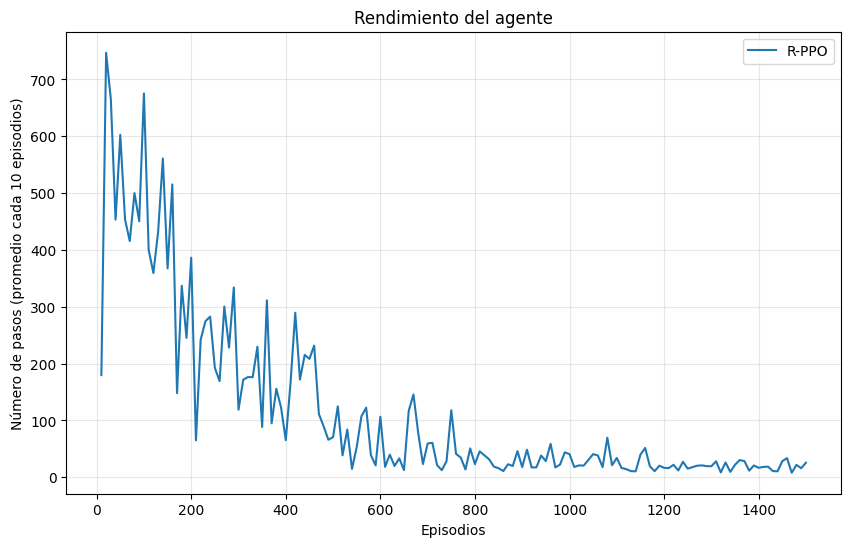

In [35]:
mem_rppo = average_runs("C:/Users/lucas/Downloads/new_results/MEM/results", 1, max_episodes = 1500)
show_graph(
    x = np.arange(1, len(mem_rppo) + 1),
    y = mem_rppo,
    name = "R-PPO",
    interval = 10
)

Corrida 0: 1500 episodios

Promedio calculado sobre 1 corridas, 1500 episodios


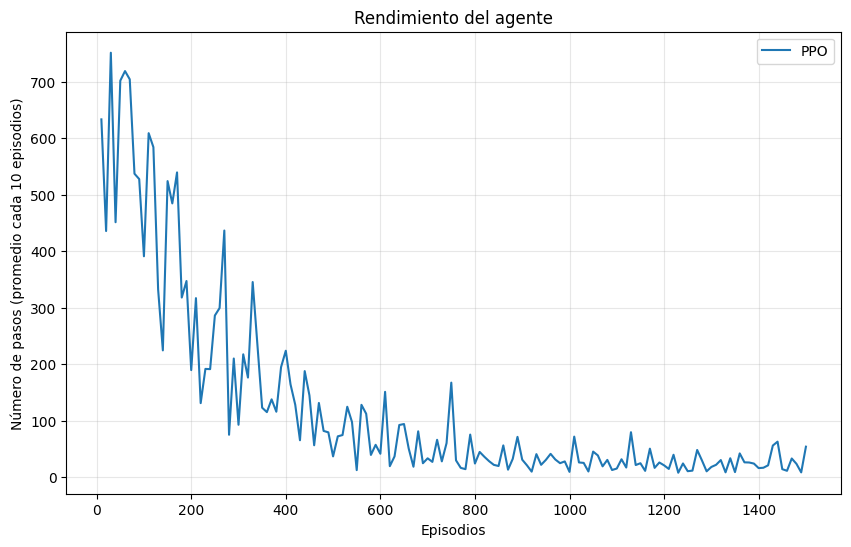

In [39]:
mem_ppo = average_runs("C:/Users/lucas/Downloads/new_baseline/MEM/results", 1, max_episodes = 1500)
show_graph(
    x = np.arange(1, len(mem_ppo) + 1),
    y = mem_ppo,
    name = "PPO",
    interval = 10
)

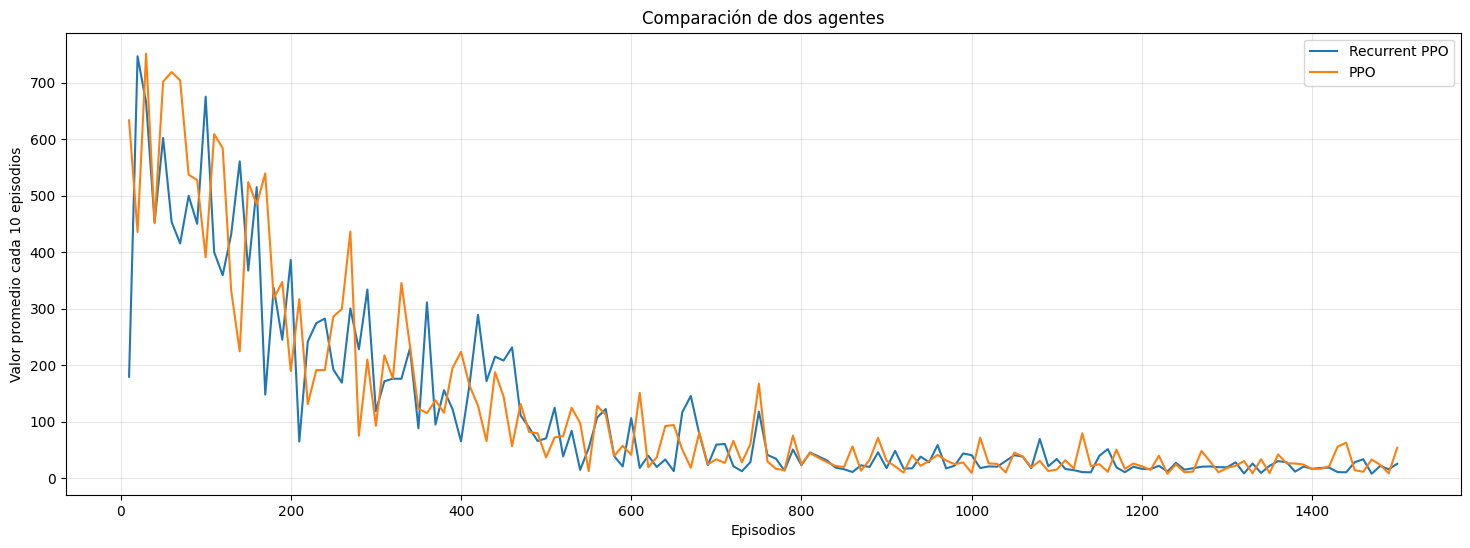

In [48]:
show_graph_two(
    x1 = np.arange(1, len(mem_rppo) + 1),
    y1 = mem_rppo,
    name1 = "Recurrent PPO",
    x2 = np.arange(1, len(mem_ppo) + 1),
    y2 = mem_ppo,
    name2 = "PPO",
    interval = 10,
    figsize_d = (18, 6)
)

## Door Key

Corrida 0: 1629 episodios

Promedio calculado sobre 1 corridas, 1629 episodios


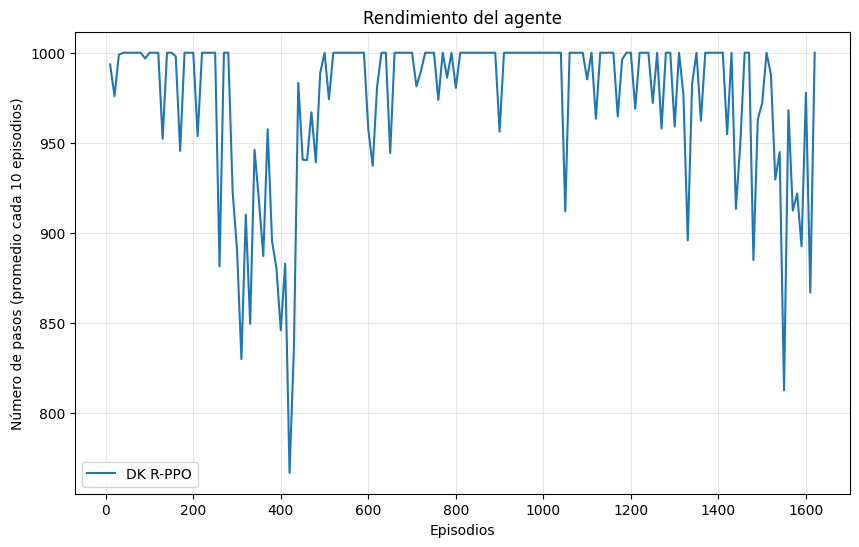

In [52]:
dk_rppo = average_runs("C:/Users/lucas/Downloads/new_results/DK/results", 1, max_episodes = 3000)
show_graph(
    x = np.arange(1, len(dk_rppo) + 1),
    y = dk_rppo,
    name = "DK R-PPO",
    interval = 10
)

Corrida 0: 810 episodios

Promedio calculado sobre 1 corridas, 810 episodios


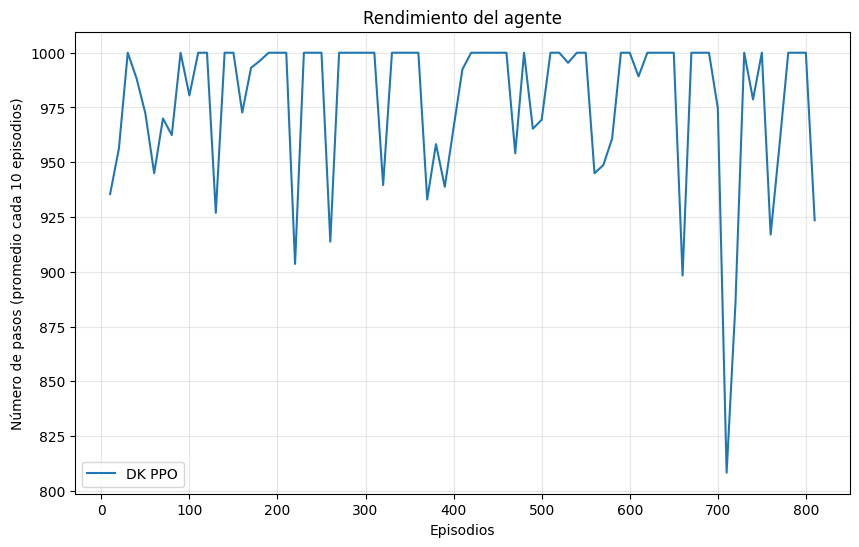

In [50]:
dk_ppo = average_runs("C:/Users/lucas/Downloads/new_baseline/DK/results", 1, max_episodes = 3000)
show_graph(
    x = np.arange(1, len(dk_ppo) + 1),
    y = dk_ppo,
    name = "DK PPO",
    interval = 10
)

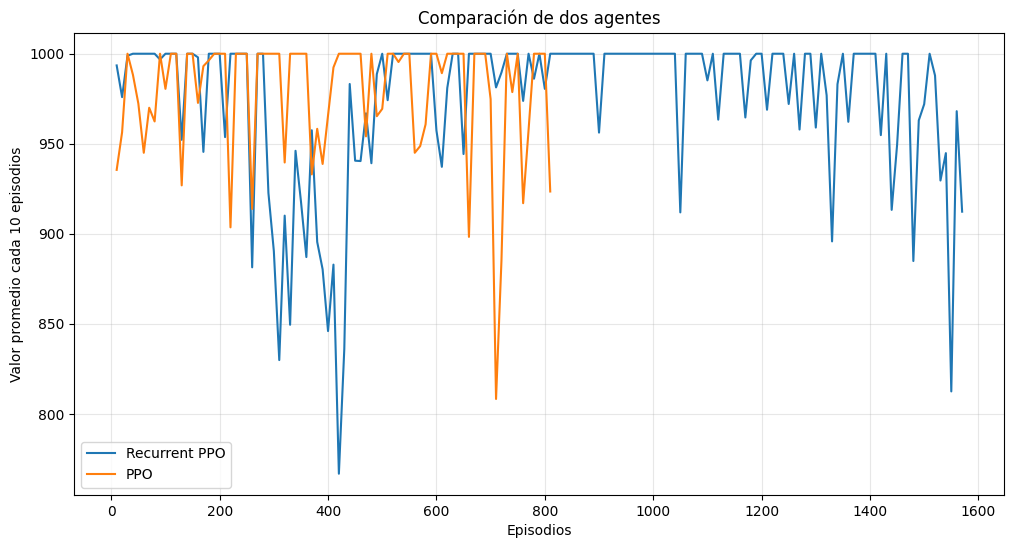

In [51]:
show_graph_two(
    x1 = np.arange(1, len(dk_rppo) + 1),
    y1 = dk_rppo,
    name1 = "Recurrent PPO",
    x2 = np.arange(1, len(dk_ppo) + 1),
    y2 = dk_ppo,
    name2 = "PPO",
    interval = 10,
    figsize_d=(12,6)
)

## Simple Crossing

Corrida 0: 7500 episodios
Corrida 1: 7226 episodios
Corrida 2: 7500 episodios

Promedio calculado sobre 3 corridas, 7226 episodios


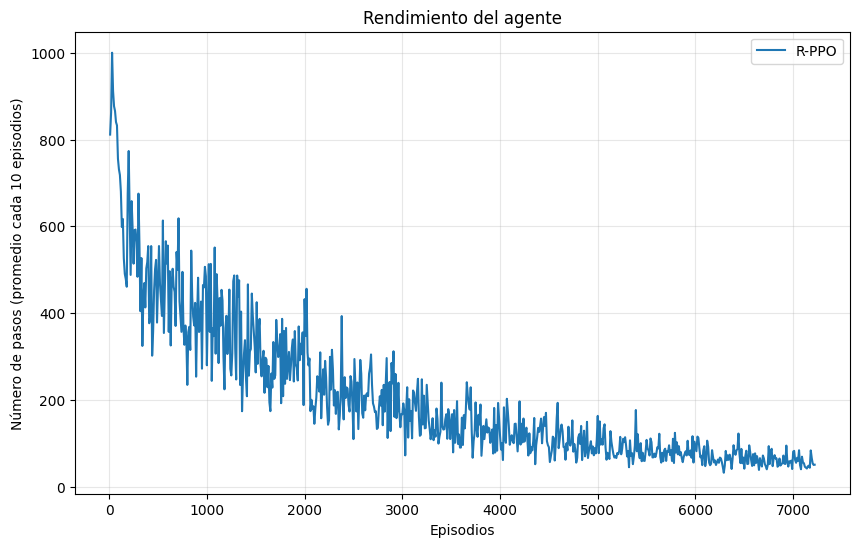

In [288]:
sc_rppo = average_runs("C:/Users/lucas/Downloads/results/SC/results", 3, max_episodes = 7500)
show_graph(
    x = np.arange(1, len(sc_rppo) + 1),
    y = sc_rppo,
    name = "R-PPO",
    interval = 10
)

Corrida 0: 4708 episodios
Corrida 1: 4486 episodios
Corrida 2: 4708 episodios

Promedio calculado sobre 3 corridas, 4486 episodios


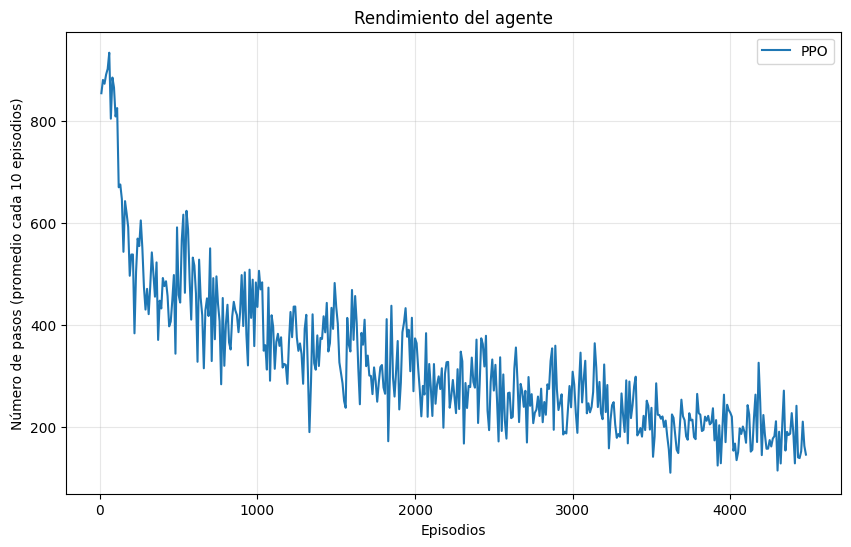

In [282]:
sc_ppo = average_runs("C:/Users/lucas/Downloads/baseline/SC/results", 3, max_episodes = 4708)
show_graph(
    x = np.arange(1, len(sc_ppo) + 1),
    y = sc_ppo,
    name = "PPO",
    interval = 10
)

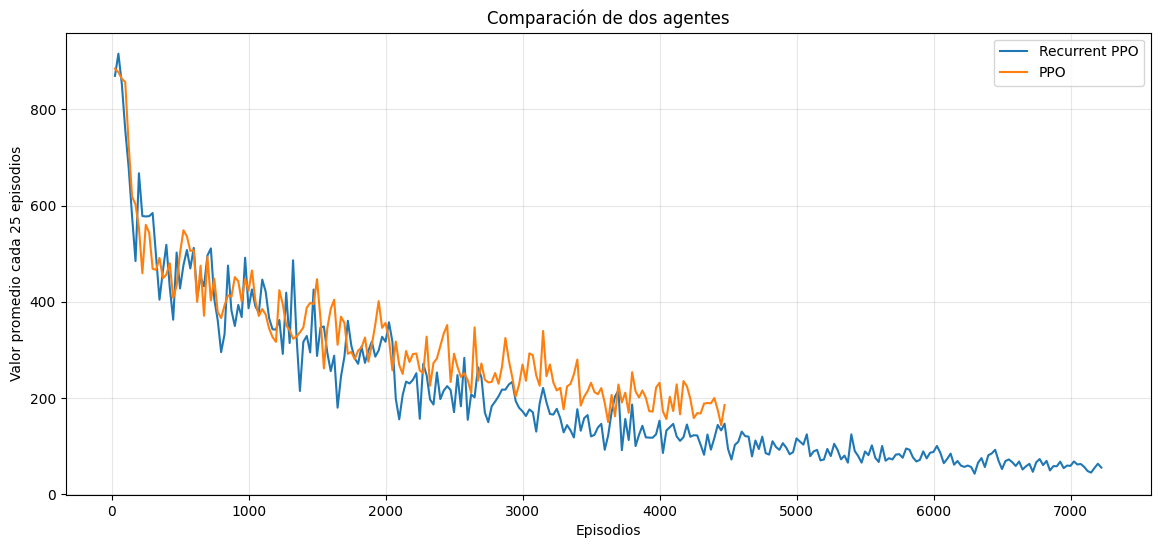

In [289]:
show_graph_two(
    x1 = np.arange(1, len(sc_rppo) + 1),
    y1 = sc_rppo,
    name1 = "Recurrent PPO",
    x2 = np.arange(1, len(sc_ppo) + 1),
    y2 = sc_ppo,
    name2 = "PPO",
    interval = 25,
    figsize_d=(14,6)
)

## Empty

Corrida 0: 5000 episodios

Promedio calculado sobre 1 corridas, 5000 episodios


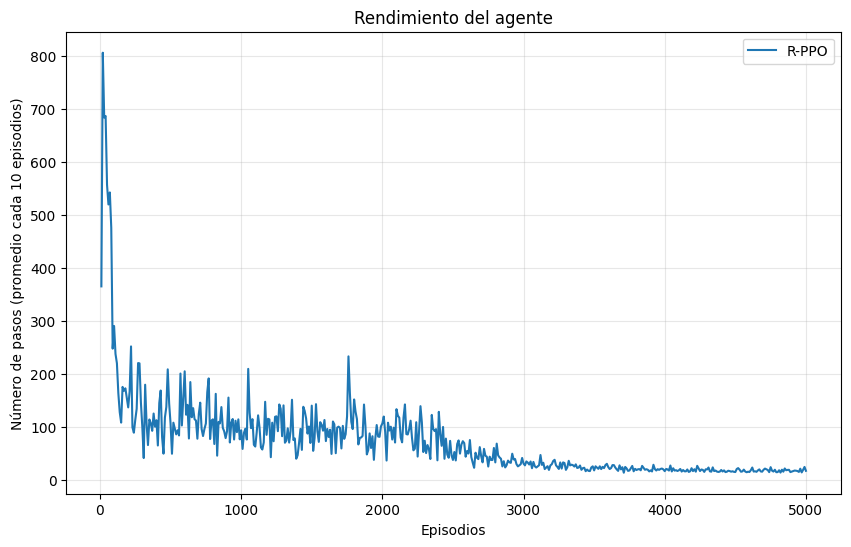

In [19]:
e_rppo = average_runs("C:/Users/lucas/Downloads/new_results/EMPTY/results", 1, max_episodes = 5000)
show_graph(
    x = np.arange(1, len(e_rppo) + 1),
    y = e_rppo,
    name = "R-PPO",
    interval = 10
)

Corrida 0: 5000 episodios

Promedio calculado sobre 1 corridas, 5000 episodios


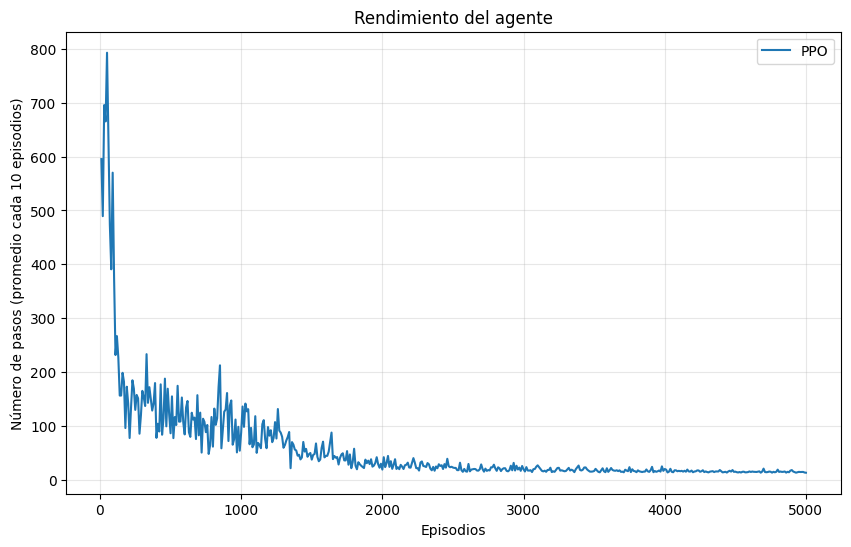

In [20]:
e_ppo = average_runs("C:/Users/lucas/Downloads/new_baseline/EMPTY/results", 1, max_episodes = 5000)
show_graph(
    x = np.arange(1, len(e_ppo) + 1),
    y = e_ppo,
    name = "PPO",
    interval = 10
)

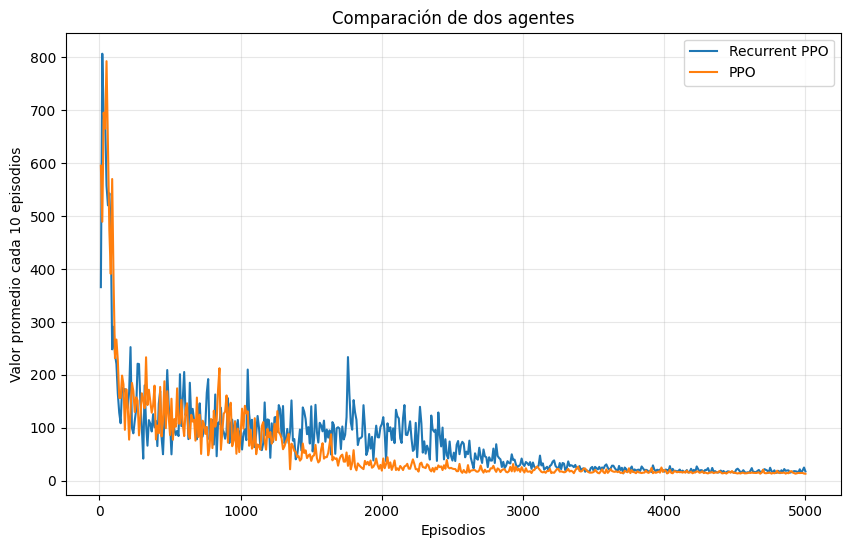

In [21]:
show_graph_two(
    x1 = np.arange(1, len(e_rppo) + 1),
    y1 = e_rppo,
    name1 = "Recurrent PPO",
    x2 = np.arange(1, len(e_ppo) + 1),
    y2 = e_ppo,
    name2 = "PPO",
    interval = 10
)